## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Importing data set
df=pd.read_csv('spam.csv',encoding='latin1') # Encoding = 'latin-1' means that the data is encoded using the ISO/IEC 8859-1 standard
df.head()

,v1,v2,col1,col2,col3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
 2   col1    50 non-null     object
 3   col2    12 non-null     object
 4   col3    6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Dropping the useless columns
df.drop(['col1','col2','col3'],axis=1,inplace=True)
df.sample(10)

,v1,v2
2021,ham,"I don't have anybody's number, I still haven't..."
3748,spam,Dear Voucher Holder 2 claim your 1st class air...
2090,ham,S:-)kallis wont play in first two odi:-)
1881,ham,Ok.. ÌÏ finishing soon?
209,ham,Both :) i shoot big loads so get ready!
4302,ham,Yup i'm free...
1781,ham,";-( oh well, c u later"
2332,ham,We are both fine. Thanks
3716,ham,I'm gonna rip out my uterus.
2064,ham,Pass dis to all ur contacts n see wat u get! R...


In [7]:
#renaming the columns
df.rename(columns={'v1' : 'target','v2' : 'text'},inplace=True)
df.sample(5)

,target,text
1247,ham,Horrible gal. Me in sch doing some stuff. How ...
5255,ham,Ok... Sweet dreams...
1992,spam,Free tones Hope you enjoyed your new content. ...
3186,ham,Howz that persons story
233,ham,Yes:)here tv is always available in work place..


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# checking the duplicate values
df.duplicated().sum()

403

In [12]:
# removing the duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.shape

(5169, 2)

## Exploratory data analysis

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

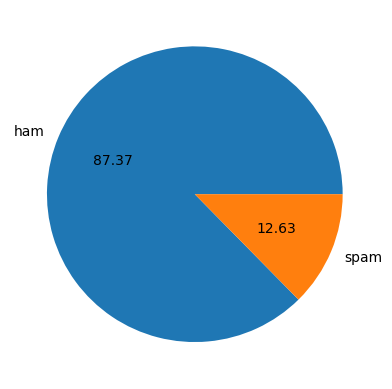

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f");

In [16]:
# spam values are less so it should be balanced
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MAHALINGAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters'] = df['text'].apply(len)
# it creats new column named num_characters having the length of the SMS

In [19]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# creating new columns contains number of words and sentences in SMS
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# For ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123782,1.820195
std,56.358868,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# for spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
import seaborn as sns

In [26]:
# Removing warnings from seaborn
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

<Axes: xlabel='num_characters', ylabel='Count'>

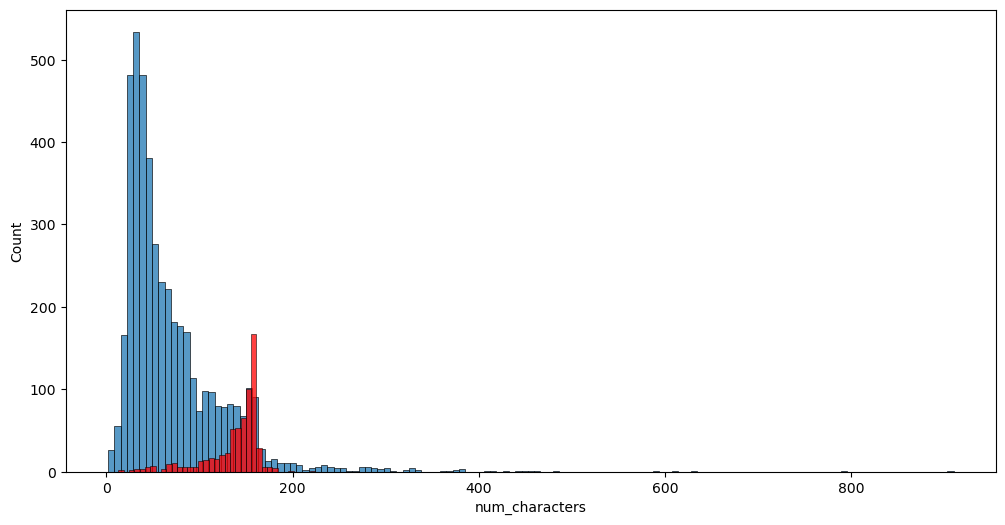

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

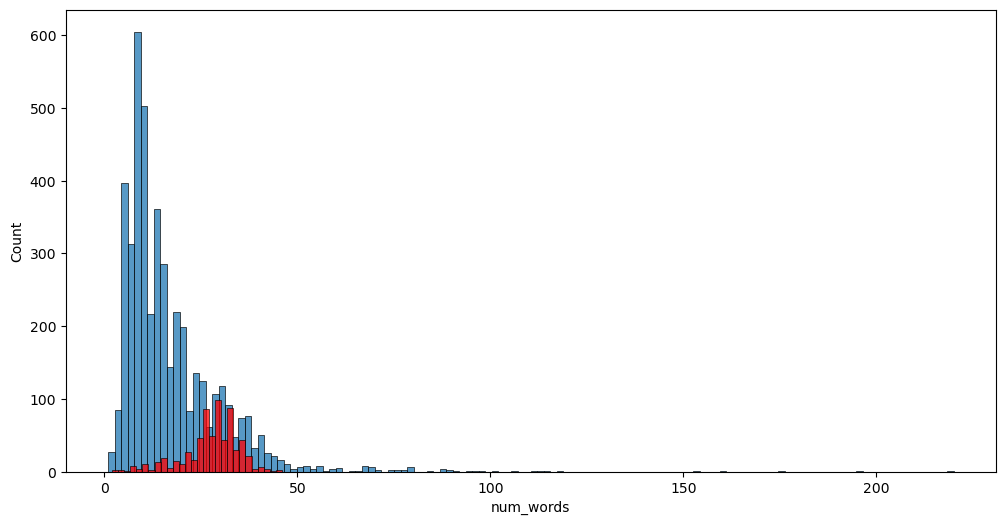

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

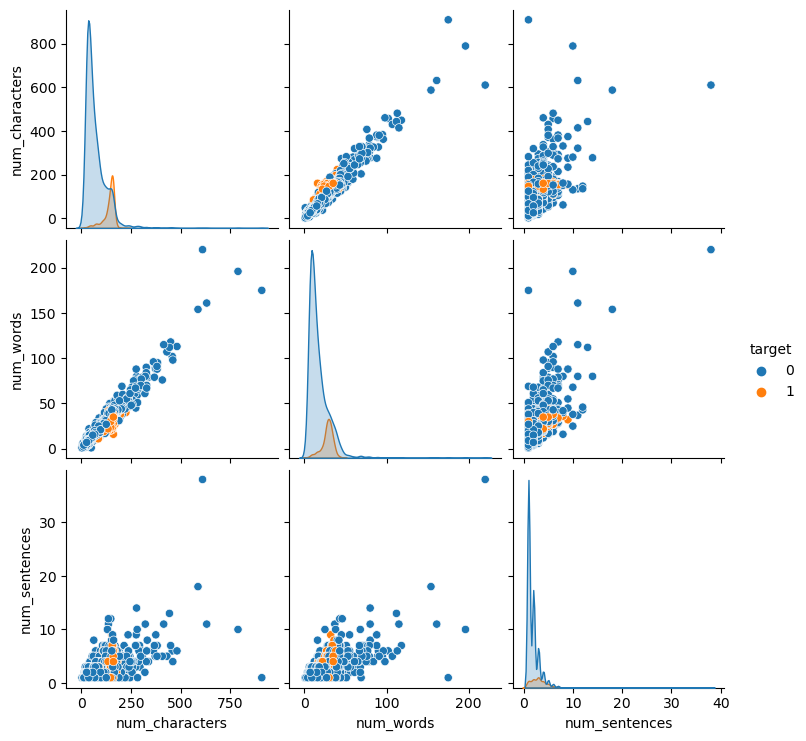

In [29]:
sns.pairplot(df,hue='target');

## Data Preprocessing

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAHALINGAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
ps = PorterStemmer()
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight,k? I've cried enough today.")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


In [33]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('lovingg')

'lovingg'

In [35]:
df['transformed_text'] = df['text'].apply(transform_text)

In [36]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

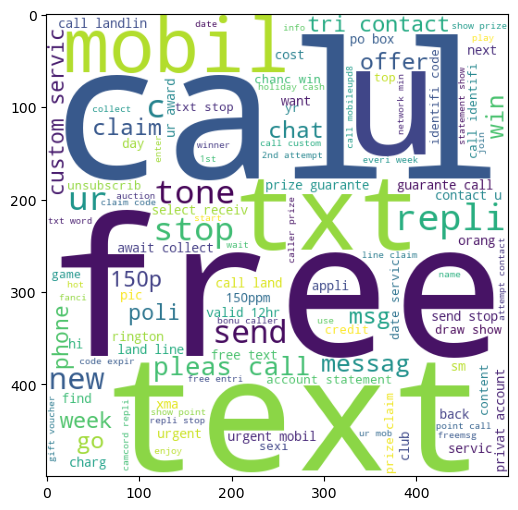

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc);

In [40]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

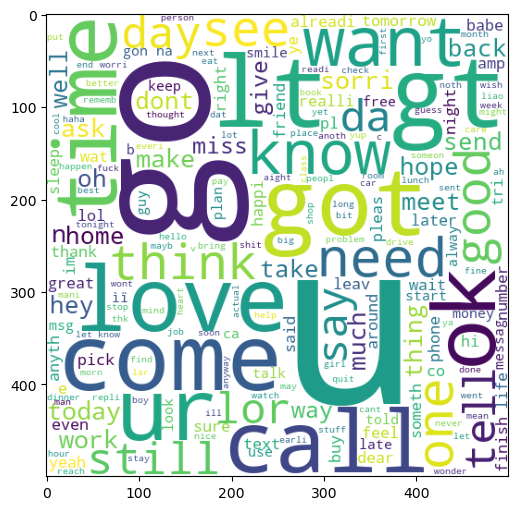

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc);

In [42]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

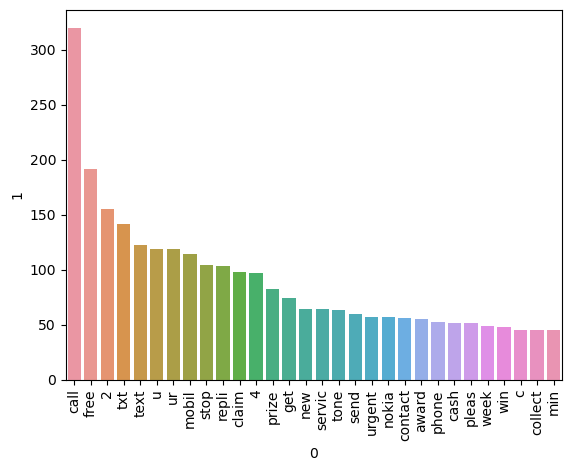

In [44]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show();

In [45]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

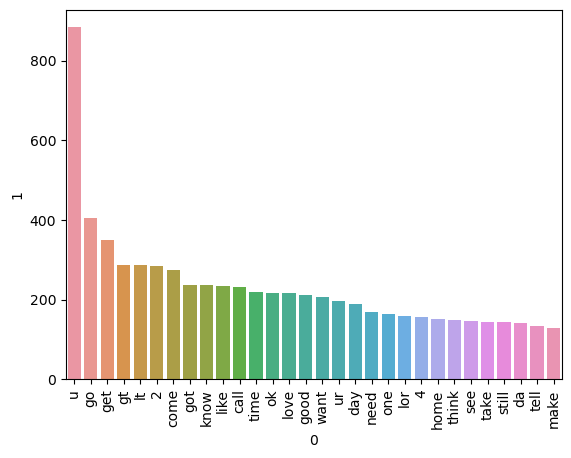

In [46]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show();

## Building the model

In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [48]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [49]:
X.shape

(5169, 3000)

In [50]:
y = df['target'].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [56]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [57]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
svc = SVC(kernel='sigmoid' , gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [61]:
clfs = {'SVC' : svc, 'KN' : knc, 'NB' : mnb, 'DT' : dtc, 'LR' : lrc, 'RF' : rfc, 'Adaboost' : abc, 'BgC' : bc, 'ETC' : etc, 'GBDT' : gbdt, 'xgb' : xgb}

In [62]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [63]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [64]:
accuracy_scores = []
precision_scores = []

for name,clf in  clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ", current_accuracy)
    print("Precesion - ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precesion -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precesion -  1.0
For  NB
Accuracy -  0.9709864603481625
Precesion -  1.0
For  DT
Accuracy -  0.9274661508704062
Precesion -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precesion -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precesion -  0.9829059829059829
For  Adaboost
Accuracy -  0.960348162475822
Precesion -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precesion -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precesion -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precesion -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precesion -  0.9262295081967213


In [65]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision')

In [66]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.927466,0.811881
7,BgC,0.958414,0.868217
9,GBDT,0.946809,0.919192
10,xgb,0.967118,0.926230
6,Adaboost,0.960348,0.929204
4,LR,0.958414,0.970297
8,ETC,0.974855,0.974576
0,SVC,0.975822,0.974790
5,RF,0.975822,0.982906
1,KN,0.905222,1.000000


In [67]:
performance_df1 = pd.melt(performance_df , id_vars="Algorithm")

In [68]:
performance_df1

,Algorithm,variable,value
0,DT,Accuracy,0.927466
1,BgC,Accuracy,0.958414
2,GBDT,Accuracy,0.946809
3,xgb,Accuracy,0.967118
4,Adaboost,Accuracy,0.960348
5,LR,Accuracy,0.958414
6,ETC,Accuracy,0.974855
7,SVC,Accuracy,0.975822
8,RF,Accuracy,0.975822
9,KN,Accuracy,0.905222


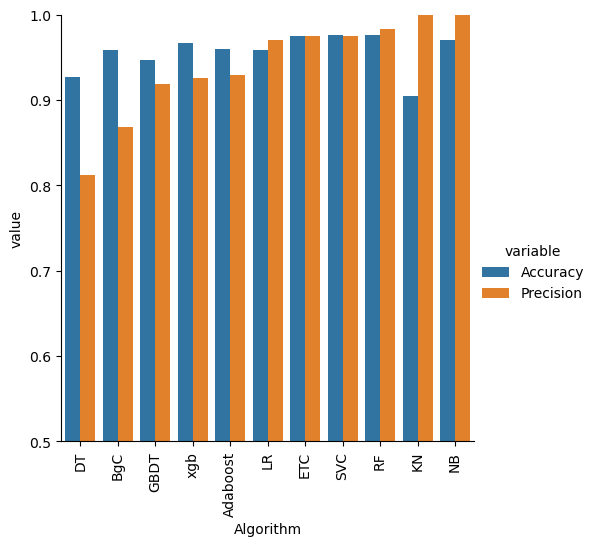

In [69]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [70]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys() , 'Accuracy_max_ft_3000' : accuracy_scores,'Precision_max_ft_3000' : precision_scores})

In [71]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [72]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [73]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars')

In [74]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,DT,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881
1,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
2,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
3,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
4,Adaboost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
7,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
8,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
9,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000


In [75]:
# voting classifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [76]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [77]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [78]:
y_pred = voting.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Precision ",precision_score(y_test,y_pred))

Accuracy  0.9816247582205029
Precision  0.9917355371900827


In [79]:
#Applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [80]:
from sklearn.ensemble import StackingClassifier

In [81]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [82]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy ",accuracy_score(y_test,y_pred))
print("Precision ",precision_score(y_test,y_pred))

Accuracy  0.9796905222437138
Precision  0.9465648854961832


In [83]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [84]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data and corresponding labels
X_train = ["Sample text 1","Sample text 2","Sample text 3"]
y_train = [0,1,0]

# create and train TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True,stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

#Create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)

#save the trained TF-IDF vectorizer & Naive bayes as files
with open('vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)

with open('model.pkl','wb') as model_file:
    pickle.dump(mnb,model_file)